In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle

# Load dataset
df = pd.read_csv('/content/35_window_train.csv')

# Balance the dataset: take 5000 0s and 5000 1s
group_1 = df[df['Label'] == 1].sample(n=9000, random_state=42)
group_0 = df[df['Label'] == 0].sample(n= 1000, random_state=42)
balanced_df = pd.concat([group_1, group_0])

# Shuffle the balanced dataset
balanced_df = shuffle(balanced_df, random_state=42)

# Define the function to compute DPC features
def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Compute DPC features
balanced_df['DPC'] = balanced_df['Seq'].apply(compute_dpc)

# Convert 'DPC' column to numpy array
X = np.array(balanced_df['DPC'].tolist())
y = balanced_df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

# Predict on the test set
y_pred = et_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Extra Trees Classifier Accuracy: {accuracy * 100:.2f}%')

# Optionally, print the number of 0s and 1s in predictions
num_zeros = (y_pred == 0).sum()
num_ones = (y_pred == 1).sum()

print(f'Number of 0s in predictions: {num_zeros}')
print(f'Number of 1s in predictions: {num_ones}')


Extra Trees Classifier Accuracy: 88.85%
Number of 0s in predictions: 13
Number of 1s in predictions: 1987


Window Size: 5
Extra Trees Classifier Accuracy: 86.70%
Number of 0s in predictions: 64
Number of 1s in predictions: 1936
Window Size: 7
Extra Trees Classifier Accuracy: 88.85%
Number of 0s in predictions: 11
Number of 1s in predictions: 1989
Window Size: 9
Extra Trees Classifier Accuracy: 89.10%
Number of 0s in predictions: 6
Number of 1s in predictions: 1994
Window Size: 11
Extra Trees Classifier Accuracy: 89.20%
Number of 0s in predictions: 6
Number of 1s in predictions: 1994
Window Size: 13
Extra Trees Classifier Accuracy: 89.25%
Number of 0s in predictions: 3
Number of 1s in predictions: 1997
Window Size: 15
Extra Trees Classifier Accuracy: 89.25%
Number of 0s in predictions: 3
Number of 1s in predictions: 1997
Window Size: 17
Extra Trees Classifier Accuracy: 89.20%
Number of 0s in predictions: 6
Number of 1s in predictions: 1994
Window Size: 19
Extra Trees Classifier Accuracy: 89.05%
Number of 0s in predictions: 9
Number of 1s in predictions: 1991
Window Size: 21
Extra Trees Class

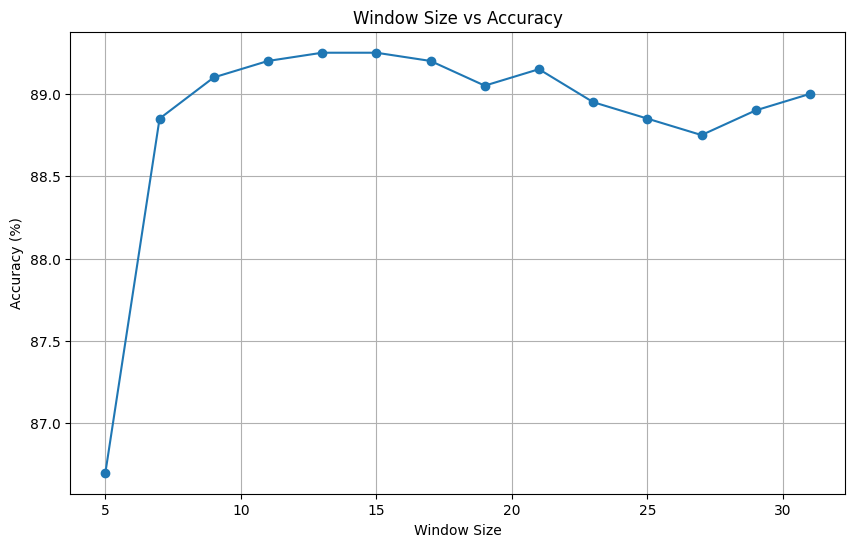

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define window sizes from 5 to 31, incrementing by 2
window_sizes = list(range(5, 32, 2))
results = []

for window_size in window_sizes:
    # Load dataset for the current window size
    file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
    df = pd.read_csv(file_path)

    # Balance the dataset: take 5000 0s and 5000 1s
    group_1 = df[df['Label'] == 1].sample(n=9000, random_state=42)
    group_0 = df[df['Label'] == 0].sample(n=1000, random_state=42)
    balanced_df = pd.concat([group_1, group_0])

    # Shuffle the balanced dataset
    balanced_df = shuffle(balanced_df, random_state=42)

    # Compute DPC features
    balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

    # Convert 'DPC' column to numpy array
    X = np.array(balanced_df['DPC'].tolist())
    y = balanced_df['Label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Extra Trees Classifier
    et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    et_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = et_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((window_size, accuracy * 100))

    # Print results
    print(f'Window Size: {window_size}')
    print(f'Extra Trees Classifier Accuracy: {accuracy * 100:.2f}%')
    print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
    print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Window Size', 'Accuracy'])

# Save results to CSV
results_df.to_csv('/content/accuracy_results.csv', index=False)

# Plot window size vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['Window Size'], results_df['Accuracy'], marker='o')
plt.xlabel('Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Window Size vs Accuracy')
plt.grid(True)
plt.show()


## Different Window Size with Random Forest

Window Size: 21
Random Forest Classifier Accuracy: 88.67%
Number of 0s in predictions: 8
Number of 1s in predictions: 1792
Window Size: 23
Random Forest Classifier Accuracy: 88.61%
Number of 0s in predictions: 3
Number of 1s in predictions: 1797
Window Size: 25
Random Forest Classifier Accuracy: 88.61%
Number of 0s in predictions: 3
Number of 1s in predictions: 1797
Window Size: 27
Random Forest Classifier Accuracy: 88.61%
Number of 0s in predictions: 1
Number of 1s in predictions: 1799
Window Size: 29
Random Forest Classifier Accuracy: 88.28%
Number of 0s in predictions: 9
Number of 1s in predictions: 1791
Window Size: 31
Random Forest Classifier Accuracy: 88.56%
Number of 0s in predictions: 2
Number of 1s in predictions: 1798
Window Size: 33
Random Forest Classifier Accuracy: 88.28%
Number of 0s in predictions: 7
Number of 1s in predictions: 1793
Window Size: 35
Random Forest Classifier Accuracy: 88.67%
Number of 0s in predictions: 4
Number of 1s in predictions: 1796
Window Size: 37


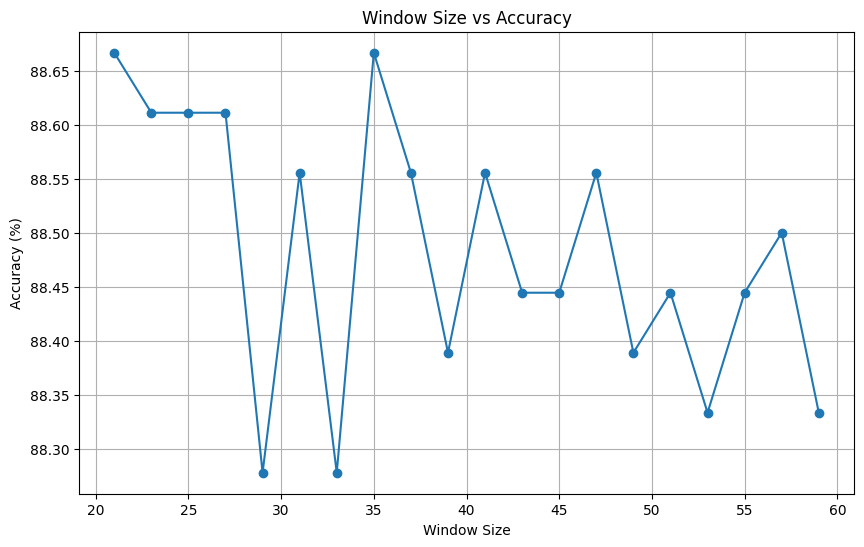

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define window sizes from 5 to 31, incrementing by 2
window_sizes = list(range(21, 61, 2))
results = []

for window_size in window_sizes:
    # Load dataset for the current window size
    file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
    df = pd.read_csv(file_path)

    # Balance the dataset: take 9000 1s and 1000 0s
    group_1 = df[df['Label'] == 1].sample(n=8000, random_state=42)
    group_0 = df[df['Label'] == 0].sample(n=1000, random_state=42)
    balanced_df = pd.concat([group_1, group_0])

    # Shuffle the balanced dataset
    balanced_df = shuffle(balanced_df, random_state=42)

    # Compute AAC and DPC features
    balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
    balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

    # Combine AAC and DPC features
    balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

    # Convert 'Features' column to numpy array
    X = np.array(balanced_df['Features'].tolist())
    y = balanced_df['Label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((window_size, accuracy * 100))

    # Print results
    print(f'Window Size: {window_size}')
    print(f'Random Forest Classifier Accuracy: {accuracy * 100:.2f}%')
    print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
    print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Window Size', 'Accuracy'])

# Save results to CSV
results_df.to_csv('/content/accuracy_results.csv', index=False)

# Plot window size vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['Window Size'], results_df['Accuracy'], marker='o')
plt.xlabel('Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Window Size vs Accuracy')
plt.grid(True)
plt.show()


## Different Window Sizes with XGBoost

Window Size: 21
XGBoost Classifier Accuracy: 88.39%
Number of 0s in predictions: 23
Number of 1s in predictions: 1777
Window Size: 23
XGBoost Classifier Accuracy: 88.83%
Number of 0s in predictions: 23
Number of 1s in predictions: 1777
Window Size: 25
XGBoost Classifier Accuracy: 87.94%
Number of 0s in predictions: 17
Number of 1s in predictions: 1783
Window Size: 27
XGBoost Classifier Accuracy: 87.94%
Number of 0s in predictions: 27
Number of 1s in predictions: 1773
Window Size: 29
XGBoost Classifier Accuracy: 88.06%
Number of 0s in predictions: 27
Number of 1s in predictions: 1773
Window Size: 31
XGBoost Classifier Accuracy: 88.33%
Number of 0s in predictions: 14
Number of 1s in predictions: 1786
Window Size: 33
XGBoost Classifier Accuracy: 88.06%
Number of 0s in predictions: 27
Number of 1s in predictions: 1773
Window Size: 35
XGBoost Classifier Accuracy: 88.33%
Number of 0s in predictions: 18
Number of 1s in predictions: 1782
Window Size: 37
XGBoost Classifier Accuracy: 88.50%
Numb

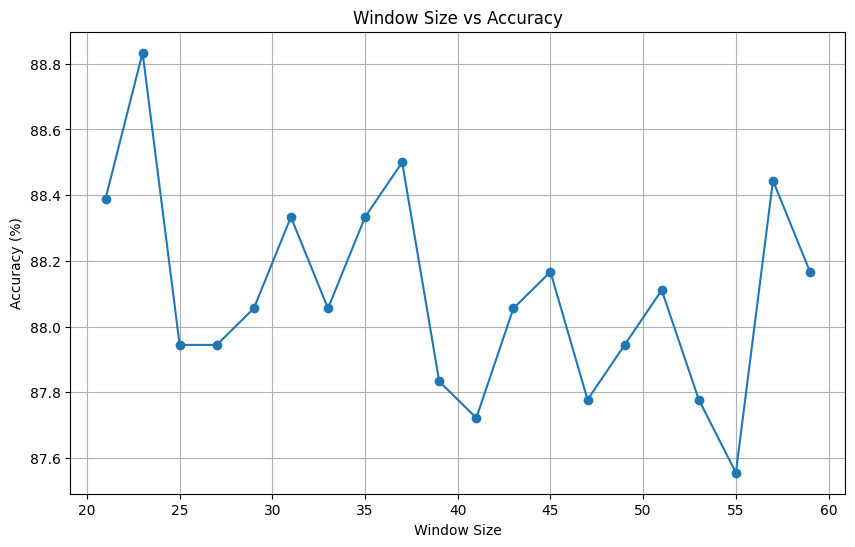

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import xgboost as xgb

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define window sizes from 5 to 31, incrementing by 2
window_sizes = list(range(21, 61, 2))
results = []

for window_size in window_sizes:
    # Load dataset for the current window size
    file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
    df = pd.read_csv(file_path)

    # Balance the dataset: take 9000 1s and 1000 0s
    group_1 = df[df['Label'] == 1].sample(n=8000, random_state=42)
    group_0 = df[df['Label'] == 0].sample(n=1000, random_state=42)
    balanced_df = pd.concat([group_1, group_0])

    # Shuffle the balanced dataset
    balanced_df = shuffle(balanced_df, random_state=42)

    # Compute AAC and DPC features
    balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
    balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

    # Combine AAC and DPC features
    balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

    # Convert 'Features' column to numpy array
    X = np.array(balanced_df['Features'].tolist())
    y = balanced_df['Label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost Classifier
    xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((window_size, accuracy * 100))

    # Print results
    print(f'Window Size: {window_size}')
    print(f'XGBoost Classifier Accuracy: {accuracy * 100:.2f}%')
    print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
    print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Window Size', 'Accuracy'])

# Save results to CSV
results_df.to_csv('/content/accuracy_results.csv', index=False)

# Plot window size vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['Window Size'], results_df['Accuracy'], marker='o')
plt.xlabel('Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Window Size vs Accuracy')
plt.grid(True)
plt.show()


## Window Window Sizes with knn

Window Size: 21
K-Nearest Neighbors Classifier Accuracy: 88.33%
Number of 0s in predictions: 22
Number of 1s in predictions: 1778
Window Size: 23
K-Nearest Neighbors Classifier Accuracy: 88.17%
Number of 0s in predictions: 15
Number of 1s in predictions: 1785
Window Size: 25
K-Nearest Neighbors Classifier Accuracy: 88.56%
Number of 0s in predictions: 10
Number of 1s in predictions: 1790
Window Size: 27
K-Nearest Neighbors Classifier Accuracy: 87.83%
Number of 0s in predictions: 15
Number of 1s in predictions: 1785
Window Size: 29
K-Nearest Neighbors Classifier Accuracy: 88.22%
Number of 0s in predictions: 18
Number of 1s in predictions: 1782
Window Size: 31
K-Nearest Neighbors Classifier Accuracy: 88.44%
Number of 0s in predictions: 8
Number of 1s in predictions: 1792
Window Size: 33
K-Nearest Neighbors Classifier Accuracy: 88.28%
Number of 0s in predictions: 17
Number of 1s in predictions: 1783
Window Size: 35
K-Nearest Neighbors Classifier Accuracy: 88.28%
Number of 0s in predictions

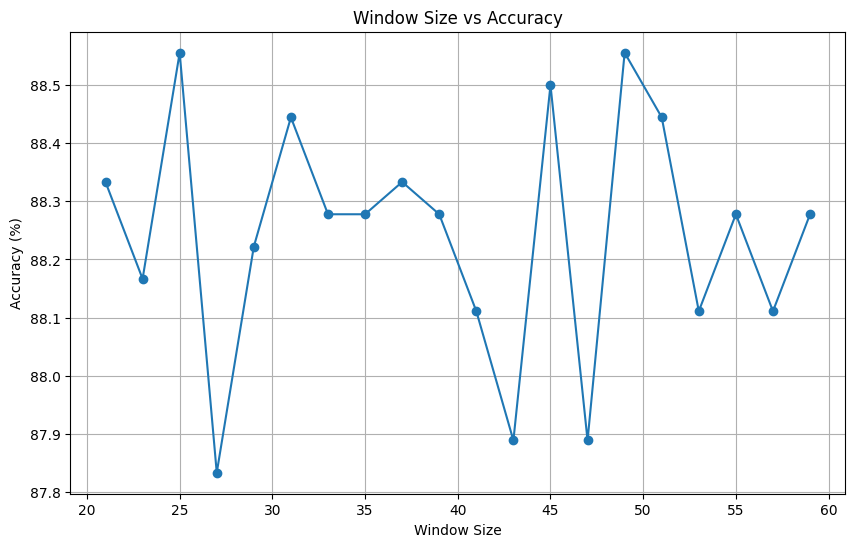

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define window sizes from 5 to 31, incrementing by 2
window_sizes = list(range(21, 61, 2))
results = []

for window_size in window_sizes:
    # Load dataset for the current window size
    file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
    df = pd.read_csv(file_path)

    # Balance the dataset: take 9000 1s and 1000 0s
    group_1 = df[df['Label'] == 1].sample(n=8000, random_state=42)
    group_0 = df[df['Label'] == 0].sample(n=1000, random_state=42)
    balanced_df = pd.concat([group_1, group_0])

    # Shuffle the balanced dataset
    balanced_df = shuffle(balanced_df, random_state=42)

    # Compute AAC and DPC features
    balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
    balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

    # Combine AAC and DPC features
    balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

    # Convert 'Features' column to numpy array
    X = np.array(balanced_df['Features'].tolist())
    y = balanced_df['Label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the K-Nearest Neighbors Classifier
    knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results.append((window_size, accuracy * 100))

    # Print results
    print(f'Window Size: {window_size}')
    print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy * 100:.2f}%')
    print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
    print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Window Size', 'Accuracy'])

# Save results to CSV
results_df.to_csv('/content/accuracy_results.csv', index=False)

# Plot window size vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['Window Size'], results_df['Accuracy'], marker='o')
plt.xlabel('Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Window Size vs Accuracy')
plt.grid(True)
plt.show()


## Differnt Window Sizes with Logistic Regression + Decision Tree + Gradient Boosting

Window Size: 21
Logistic Regression Accuracy: 88.33%
Number of 0s in predictions: 12
Number of 1s in predictions: 1788
Window Size: 21
Decision Tree Accuracy: 80.78%
Number of 0s in predictions: 178
Number of 1s in predictions: 1622
Window Size: 21
Gradient Boosting Accuracy: 88.61%
Number of 0s in predictions: 7
Number of 1s in predictions: 1793
Window Size: 23
Logistic Regression Accuracy: 88.50%
Number of 0s in predictions: 17
Number of 1s in predictions: 1783
Window Size: 23
Decision Tree Accuracy: 81.89%
Number of 0s in predictions: 194
Number of 1s in predictions: 1606
Window Size: 23
Gradient Boosting Accuracy: 88.61%
Number of 0s in predictions: 5
Number of 1s in predictions: 1795
Window Size: 25
Logistic Regression Accuracy: 88.33%
Number of 0s in predictions: 14
Number of 1s in predictions: 1786
Window Size: 25
Decision Tree Accuracy: 80.11%
Number of 0s in predictions: 204
Number of 1s in predictions: 1596
Window Size: 25
Gradient Boosting Accuracy: 88.56%
Number of 0s in pr

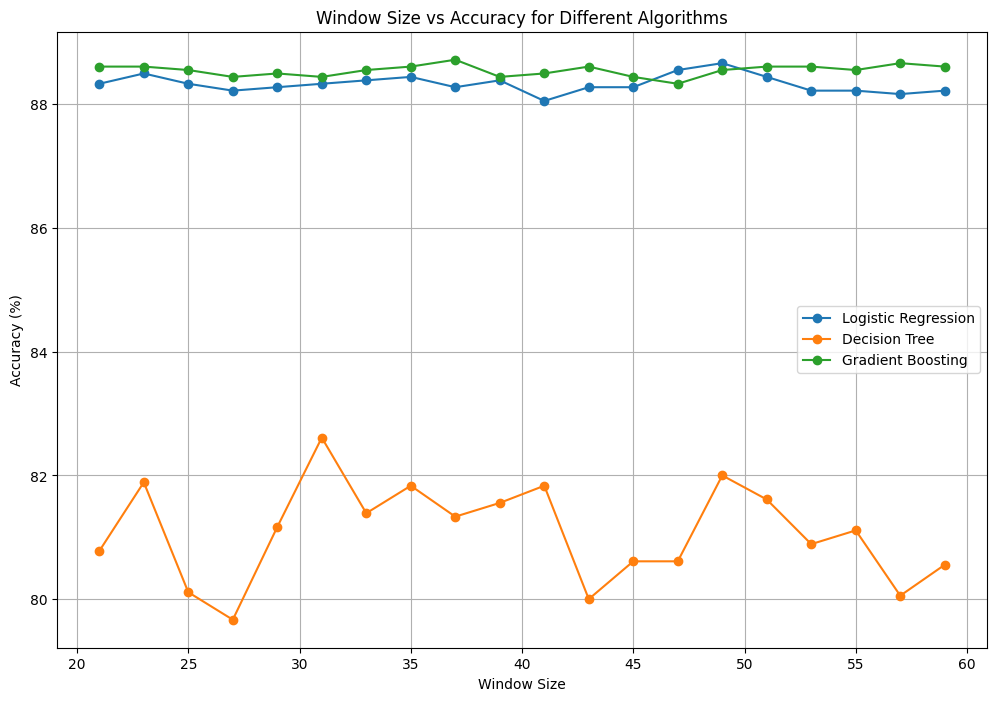

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define window sizes from 5 to 31, incrementing by 2
window_sizes = list(range(21, 61, 2))
algorithms = {
    # 'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
  #  // 'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = []

for window_size in window_sizes:
    # Load dataset for the current window size
    file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
    df = pd.read_csv(file_path)

    # Balance the dataset: take 9000 1s and 1000 0s
    group_1 = df[df['Label'] == 1].sample(n=8000, random_state=42)
    group_0 = df[df['Label'] == 0].sample(n=1000, random_state=42)
    balanced_df = pd.concat([group_1, group_0])

    # Shuffle the balanced dataset
    balanced_df = shuffle(balanced_df, random_state=42)

    # Compute AAC and DPC features
    balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
    balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

    # Combine AAC and DPC features
    balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

    # Convert 'Features' column to numpy array
    X = np.array(balanced_df['Features'].tolist())
    y = balanced_df['Label'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in algorithms.items():
        # Initialize and train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        results.append((window_size, name, accuracy * 100))

        # Print results
        print(f'Window Size: {window_size}')
        print(f'{name} Accuracy: {accuracy * 100:.2f}%')
        print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
        print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Window Size', 'Algorithm', 'Accuracy'])

# Save results to CSV
results_df.to_csv('/content/accuracy_results_all_algorithms.csv', index=False)

# Plot window size vs accuracy for each algorithm
plt.figure(figsize=(12, 8))
for algorithm in results_df['Algorithm'].unique():
    subset = results_df[results_df['Algorithm'] == algorithm]
    plt.plot(subset['Window Size'], subset['Accuracy'], marker='o', label=algorithm)

plt.xlabel('Window Size')
plt.ylabel('Accuracy (%)')
plt.title('Window Size vs Accuracy for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()


## One Hot Encoding

Training Logistic Regression...
Logistic Regression Accuracy: 0.5877192982456141
Logistic Regression Confusion Matrix:
[[   1 1175]
 [   0 1674]]

Training Decision Tree...
Decision Tree Accuracy: 0.5877192982456141
Decision Tree Confusion Matrix:
[[   1 1175]
 [   0 1674]]

Training Random Forest...
Random Forest Accuracy: 0.5877192982456141
Random Forest Confusion Matrix:
[[   1 1175]
 [   0 1674]]

Training KNN...
KNN Accuracy: 0.4126315789473684
KNN Confusion Matrix:
[[1176    0]
 [1674    0]]

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.5877192982456141
Gradient Boosting Confusion Matrix:
[[   1 1175]
 [   0 1674]]

Training AdaBoost...
AdaBoost Accuracy: 0.5877192982456141
AdaBoost Confusion Matrix:
[[   1 1175]
 [   0 1674]]

Training XGBoost...
XGBoost Accuracy: 0.5873684210526315
XGBoost Confusion Matrix:
[[   0 1176]
 [   0 1674]]



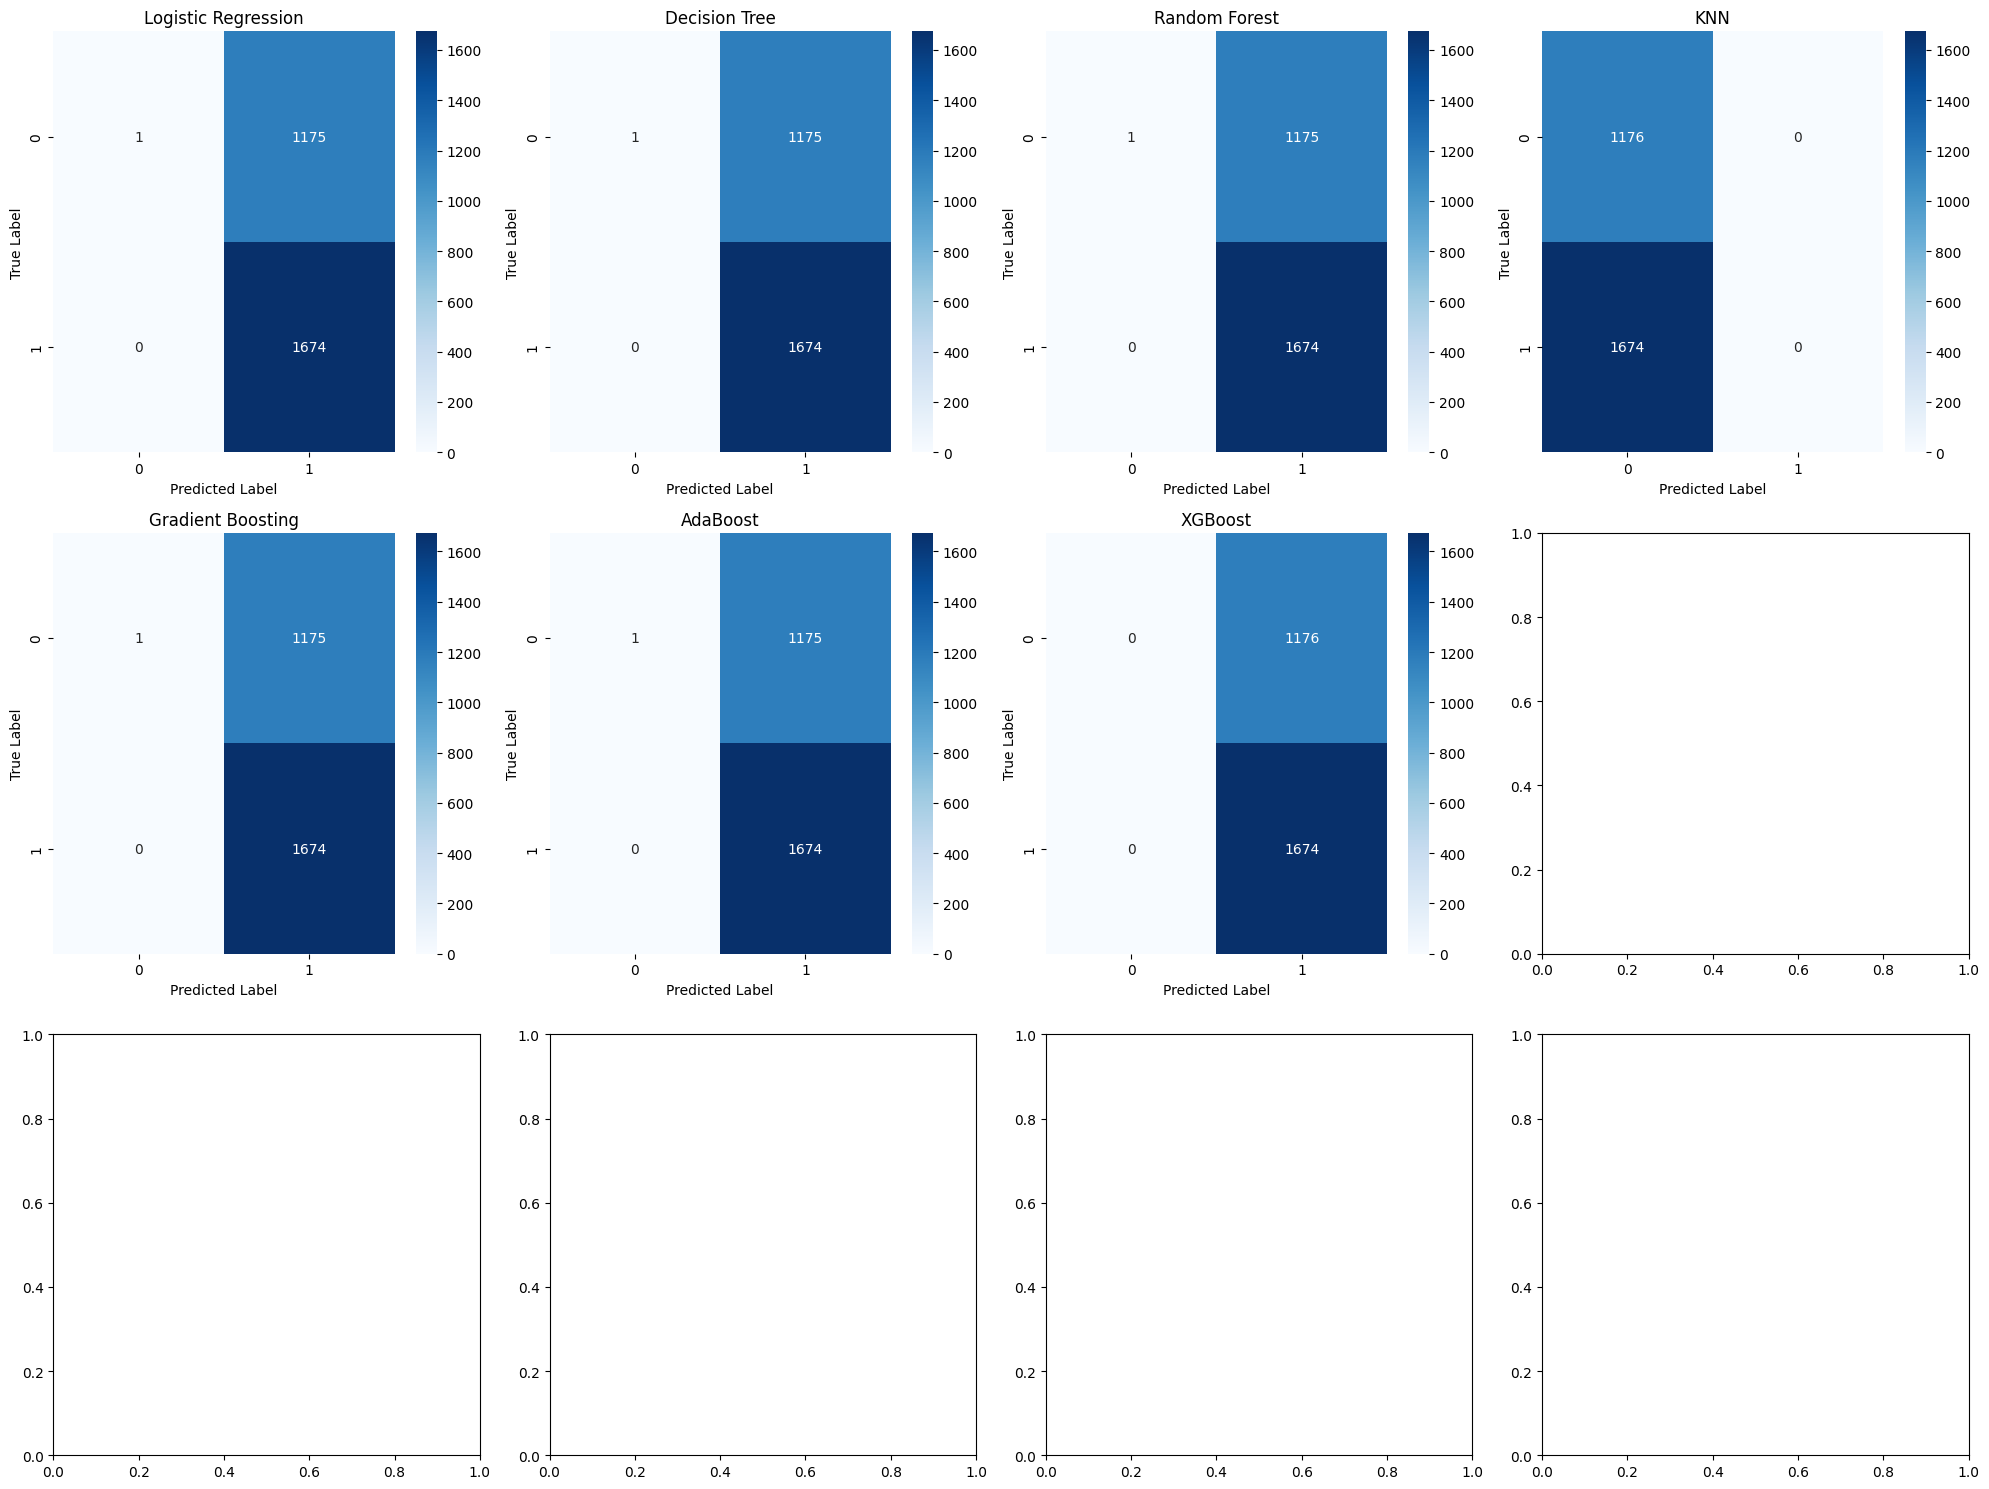

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset for window size 17
file_path = '/content/drive/MyDrive/Capstone Work/window_size_17/labeled_windows_17.csv'
data = pd.read_csv(file_path)

# Balance the dataset: take 50 samples of 1s and 50 samples of 0s
group_1 = data[data['Label'] == 1].sample(n=5500, random_state=42)
group_0 = data[data['Label'] == 0].sample(n=4000, random_state=42)
balanced_df = pd.concat([group_1, group_0])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features (X) and labels (y)
X = balanced_df['Window']
y = balanced_df['Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Bag of Words (Count Vectorization) to the text data
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    # 'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_bow, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_bow)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix
    }

    # Print results
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:")
    print(conf_matrix)
    print()

# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:

pip install xgboost catboost scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" an

Training Logistic Regression...
Logistic Regression Accuracy: 0.607
Logistic Regression Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training Decision Tree...
Decision Tree Accuracy: 0.607
Decision Tree Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training Random Forest...
Random Forest Accuracy: 0.607
Random Forest Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training KNN...
KNN Accuracy: 0.607
KNN Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.607
Gradient Boosting Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training AdaBoost...
AdaBoost Accuracy: 0.607
AdaBoost Confusion Matrix:
[[   1 1179]
 [   0 1820]]

Training XGBoost...
XGBoost Accuracy: 0.6066666666666667
XGBoost Confusion Matrix:
[[   0 1180]
 [   0 1820]]



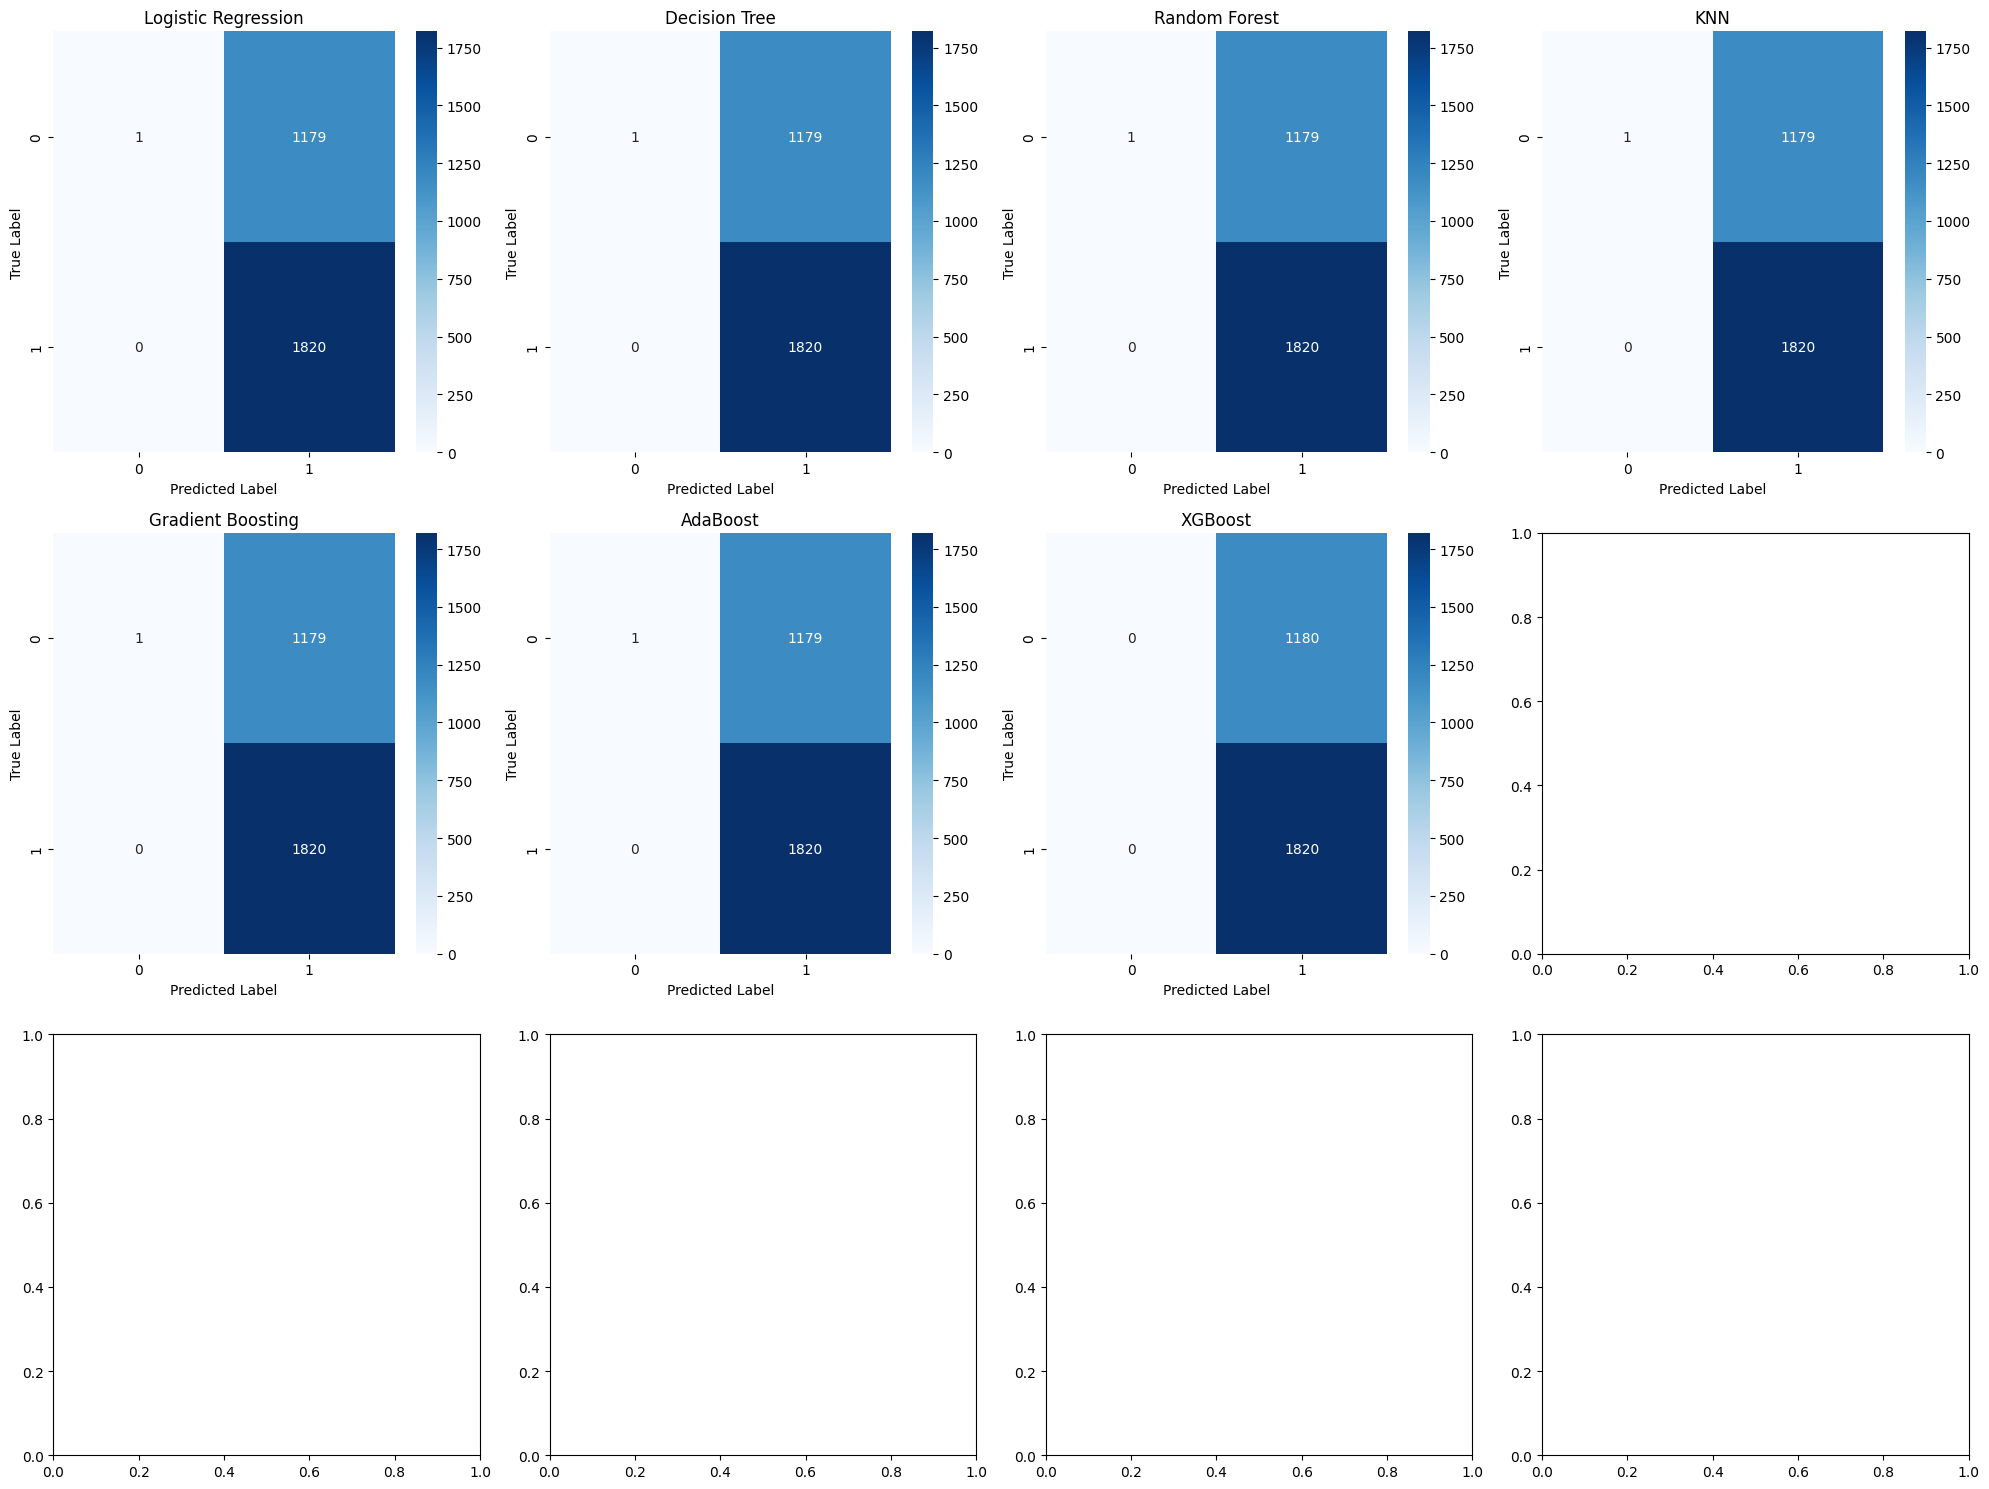

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset for window size 17
file_path = '/content/drive/MyDrive/Capstone Work/window_size_17/labeled_windows_17.csv'
data = pd.read_csv(file_path)

# Balance the dataset: take 5500 samples of label 1 and 4000 samples of label 0
group_1 = data[data['Label'] == 1].sample(n=6000, random_state=42)
group_0 = data[data['Label'] == 0].sample(n=4000, random_state=42)
balanced_df = pd.concat([group_1, group_0])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into features (X) and labels (y)
# Note: Assuming 'Window' contains AAC features
X = balanced_df['Window']
y = balanced_df['Label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Bag of Words (Count Vectorization) to the text data
# Convert AAC features to a format suitable for models
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),  # Uncomment if you want to include SVM
    # 'Naive Bayes': GaussianNB(),  # Uncomment if you want to include Naive Bayes
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train_bow, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_bow)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix
    }

    # Print results
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:")
    print(conf_matrix)
    print()

# Plot confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()
for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()
plt.show()


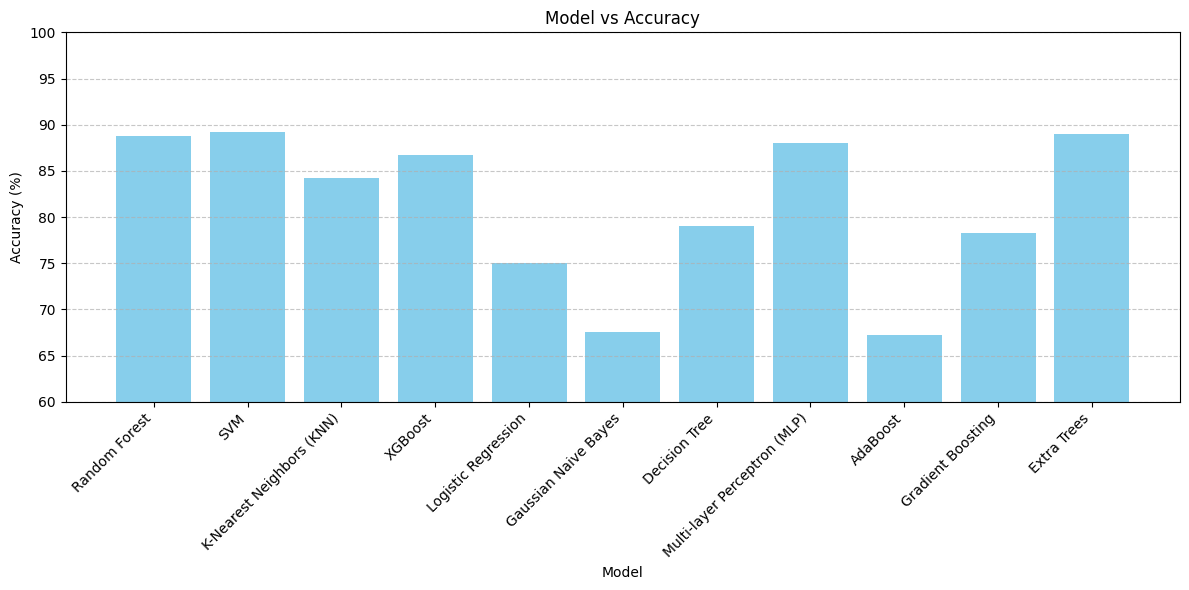

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = [
    "Random Forest",
    "SVM",
    "K-Nearest Neighbors (KNN)",
    "XGBoost",
    "Logistic Regression",
    "Gaussian Naive Bayes",
    "Decision Tree",
    "Multi-layer Perceptron (MLP)",
    "AdaBoost",
    "Gradient Boosting",
    "Extra Trees"
]

accuracies = [
    88.75,
    89.25,
    84.25,
    86.75,
    75.00,
    67.50,
    79.00,
    88.00,
    67.25,
    78.25,
    89.00
]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model vs Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(60, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-2-c7bcfae638ee>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))


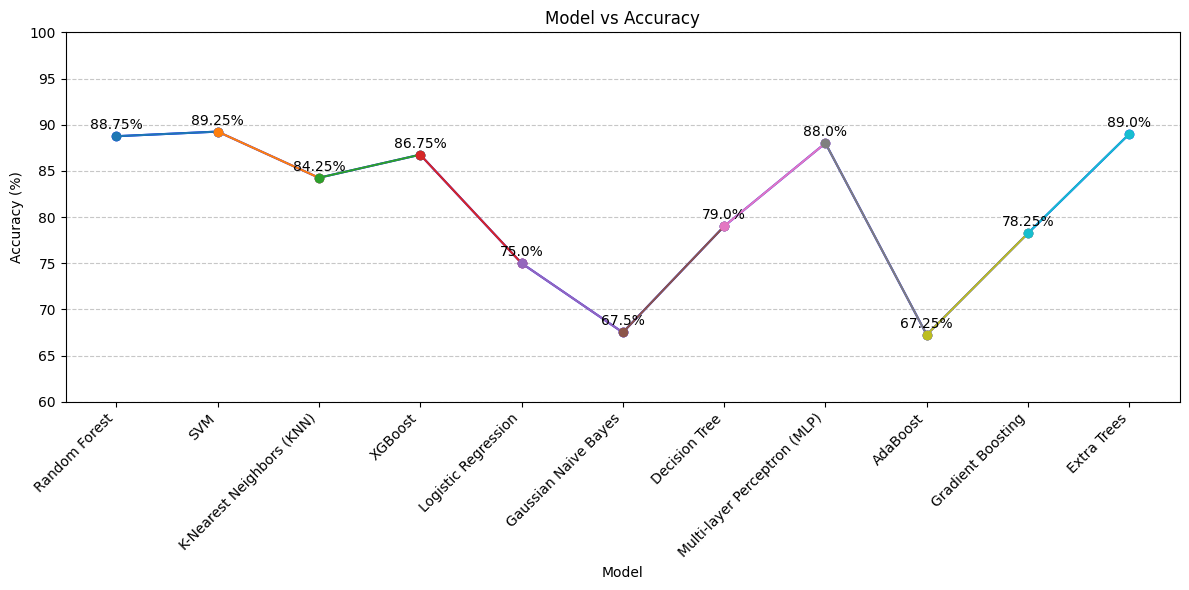

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = [
    "Random Forest",
    "SVM",
    "K-Nearest Neighbors (KNN)",
    "XGBoost",
    "Logistic Regression",
    "Gaussian Naive Bayes",
    "Decision Tree",
    "Multi-layer Perceptron (MLP)",
    "AdaBoost",
    "Gradient Boosting",
    "Extra Trees"
]

accuracies = [
    88.75,
    89.25,
    84.25,
    86.75,
    75.00,
    67.50,
    79.00,
    88.00,
    67.25,
    78.25,
    89.00
]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt}%", (models[i], accuracies[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Different colors for each line segment
colors = plt.cm.get_cmap('tab10', len(models))
for i in range(len(models) - 1):
    plt.plot(models[i:i+2], accuracies[i:i+2], marker='o', linestyle='-', color=colors(i))

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model vs Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(60, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import pickle  # To save the model
import matplotlib.pyplot as plt

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define the window size for production
window_size = 17

# Load dataset for the current window size
file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
df = pd.read_csv(file_path)

# Balance the dataset: take 9000 1s and 1000 0s
group_1 = df[df['Label'] == 1].sample(n=9000, random_state=42)
group_0 = df[df['Label'] == 0].sample(n=4000, random_state=42)
balanced_df = pd.concat([group_1, group_0])

# Shuffle the balanced dataset
balanced_df = shuffle(balanced_df, random_state=42)

# Compute AAC and DPC features
balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

# Combine AAC and DPC features
balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

# Convert 'Features' column to numpy array
X = np.array(balanced_df['Features'].tolist())
y = balanced_df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Window Size: {window_size}')
print(f'Random Forest Classifier Accuracy: {accuracy * 100:.2f}%')
print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Save the trained model using pickle
with open('rf_model_window_size_10.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)


Window Size: 17
Random Forest Classifier Accuracy: 69.62%
Number of 0s in predictions: 115
Number of 1s in predictions: 2485


In [ ]:
# Check scikit-learn version in Google Colab
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.3.2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from collections import Counter
from sklearn.utils import shuffle
import pickle  # To save the model
import matplotlib.pyplot as plt

def compute_aac(sequence):
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    aac_counts = Counter(sequence)
    aac_vector = [aac_counts[aa] / len(sequence) for aa in amino_acids]
    return aac_vector

def compute_dpc(sequence):
    sequence = sequence.replace('^', '')  # Remove any special characters if present
    amino_acids = 'ARNDCQEGHILKMFPSTWYV'
    dipeptides = [''.join(pair) for pair in product(amino_acids, repeat=2)]
    dpc_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])
    dpc_vector = [dpc_counts[dipeptide] for dipeptide in dipeptides]
    return dpc_vector

# Define the window size for production
window_size = 17

# Load dataset for the current window size
file_path = f'/content/drive/MyDrive/Capstone Work/window_size_{window_size}/labeled_windows_{window_size}.csv'
df = pd.read_csv(file_path)

# Balance the dataset: take 9000 1s and 4000 0s
group_1 = df[df['Label'] == 1].sample(n=9000, random_state=42)
group_0 = df[df['Label'] == 0].sample(n=4000, random_state=42)
balanced_df = pd.concat([group_1, group_0])

# Shuffle the balanced dataset
balanced_df = shuffle(balanced_df, random_state=42)

# Compute AAC and DPC features
balanced_df['AAC'] = balanced_df['Window'].apply(compute_aac)
balanced_df['DPC'] = balanced_df['Window'].apply(compute_dpc)

# Combine AAC and DPC features
balanced_df['Features'] = balanced_df.apply(lambda row: row['AAC'] + row['DPC'], axis=1)

# Convert 'Features' column to numpy array
X = np.array(balanced_df['Features'].tolist())
y = balanced_df['Label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Window Size: {window_size}')
print(f'Random Forest Classifier Accuracy: {accuracy * 100:.2f}%')
print(f'Number of 0s in predictions: {(y_pred == 0).sum()}')
print(f'Number of 1s in predictions: {(y_pred == 1).sum()}')

# Save the trained model using pickle
with open('rf_model_window_size_10.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Extract 10 samples from each group
sample_group_1 = group_1.sample(n=10, random_state=42)
sample_group_0 = group_0.sample(n=10, random_state=42)

# Combine samples into one DataFrame
sampled_df = pd.concat([sample_group_1, sample_group_0])

# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('/content/drive/MyDrive/Capstone Work/sample_10_per_group.csv', index=False)


Window Size: 17
Random Forest Classifier Accuracy: 69.62%
Number of 0s in predictions: 115
Number of 1s in predictions: 2485


In [ ]:
sampled_df.to_csv('/content/sample_10_per_group.csv', index=False)